In [104]:
import pandas as pd 
df=pd.read_csv("CNNexpo.csv");
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df.head(5)
tc=200;
tc=tc+1

print(df.head())

                                                code  tag
0  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
1  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
2  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
3  35 105 110 99 108 117 100 101 60 98 105 116 11...    1
4  35 105 110 99 108 117 100 101 60 98 105 116 11...    1


In [106]:
trainX,train_Y=df['code'],df['tag']

In [107]:
tmp=[]
for i in trainX:
    k=i.split()
    if(len(k)==550):
        k.append(0)
    
        
    a=np.array(k)
    a=a.astype('float32')
    
    
    a=a.reshape(tc,1)
    tmp.append(a)
train_X=np.array(tmp)
train_X.shape
type(train_X[1][1][0])



numpy.float32

In [108]:


train_X.shape

(266, 201, 1)

In [109]:
train_X=train_X/155 
train_X

array([[[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.29032257],
        [ 0.32258064],
        [ 0.26451612]],

       [[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.62580645],
        [ 0.7096774 ],
        [ 0.65806454]],

       [[ 0.22580644],
        [ 0.67741936],
        [ 0.7096774 ],
        ..., 
        [ 0.62580645],
        [ 0.7096774 ],
        [ 0.65806454]],

       ..., 
       [[ 0.75483871],
        [ 0.72258067],
        [ 0.64516127],
        ..., 
        [ 0.62580645],
        [ 0.7870968 ],
        [ 0.78064513]],

       [[ 0.75483871],
        [ 0.72258067],
        [ 0.64516127],
        ..., 
        [ 0.62580645],
        [ 0.7870968 ],
        [ 0.78064513]],

       [[ 0.75483871],
        [ 0.72258067],
        [ 0.64516127],
        ..., 
        [ 0.62580645],
        [ 0.7870968 ],
        [ 0.78064513]]], dtype=float32)

In [110]:
train_X = train_X.reshape(-1, tc,1, 1)
train_X.shape

(266, 201, 1, 1)

In [111]:
from keras.utils import to_categorical

In [112]:
train_Y_one_hot = to_categorical(train_Y)
#test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[2])
print('After conversion to one-hot:', train_Y_one_hot[2])


Original label: 1
After conversion to one-hot: [ 0.  1.]


In [113]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.15, random_state=13)

In [114]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((226, 201, 1, 1), (40, 201, 1, 1), (226, 2), (40, 2))

In [115]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [116]:
batch_size = 64
epochs = 25
num_classes = 2

In [117]:
binary_model = Sequential()
binary_model.add(Conv2D(16, kernel_size=(4, 1),activation='linear',input_shape=(tc,1,1),padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D((2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Conv2D(32, (2, 1), activation='linear',padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D(pool_size=(2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Flatten())
binary_model.add(Dense(128, activation='linear'))
binary_model.add(LeakyReLU(alpha=0.1))                  
binary_model.add(Dense(num_classes, activation='softmax'))

In [118]:
binary_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [119]:
binary_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 201, 1, 16)        80        
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 201, 1, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 101, 1, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 101, 1, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 101, 1, 32)        1056      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 101, 1, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 51, 1, 32)         0         
__________

In [120]:
binary_train = binary_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 226 samples, validate on 40 samples
Epoch 1/25
226/226 [==============================] - 1s 3ms/step - loss: 0.8583 - acc: 0.4513 - val_loss: 0.7234 - val_acc: 0.5250
Epoch 2/25
226/226 [==============================] - 0s 531us/step - loss: 0.7745 - acc: 0.4912 - val_loss: 0.6996 - val_acc: 0.5250
Epoch 3/25
226/226 [==============================] - 0s 580us/step - loss: 0.6995 - acc: 0.5133 - val_loss: 0.6951 - val_acc: 0.4750
Epoch 4/25
226/226 [==============================] - 0s 779us/step - loss: 0.6901 - acc: 0.5044 - val_loss: 0.6985 - val_acc: 0.4750
Epoch 5/25
226/226 [==============================] - 0s 549us/step - loss: 0.6854 - acc: 0.5088 - val_loss: 0.6937 - val_acc: 0.4750
Epoch 6/25
226/226 [==============================] - 0s 500us/step - loss: 0.6813 - acc: 0.5310 - val_loss: 0.6870 - val_acc: 0.4750
Epoch 7/25
226/226 [==============================] - 0s 522us/step - loss: 0.6752 - acc: 0.6504 - val_loss: 0.6829 - val_acc: 0.8750
Epoch 8/25
226/226 

In [121]:
test_eval =binary_model.evaluate(train_X, train_label, verbose=0)

In [122]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.458401286497
Test accuracy: 0.778761061947


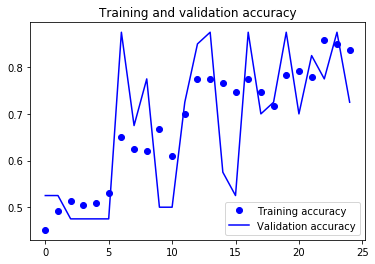

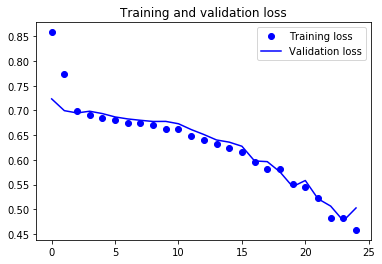

In [123]:
accuracy = binary_train.history['acc']
val_accuracy = binary_train.history['val_acc']
loss = binary_train.history['loss']
val_loss = binary_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [124]:
from sklearn.metrics import classification_report
predicted_classes=binary_model.predict(valid_X)
#print(predicted_classes)

In [125]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [126]:
predicted_classes


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [127]:
actual= np.argmax(np.round(valid_label),axis=1)

In [128]:
actual

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(predicted_classes,actual))

             precision    recall  f1-score   support

          0       0.48      1.00      0.65        10
          1       1.00      0.63      0.78        30

avg / total       0.87      0.72      0.74        40



In [130]:

def cleanData(c):
    code=c
    df1 = pd.DataFrame({'A':[code]})
            
    df1 = df1.replace('\n',' ', regex=True)
    df1 = df1.replace('\t',' ', regex=True)
    df1 = df1.replace('\r',' ', regex=True)
    df1 = df1.replace(',',' ', regex=True)
    c=0
    tmp=""
    for i in df1['A']:
                c=0
                aa=i.split()
                ff=0
                #print(aa)
                for it in aa:
                    #print(it)
                    if ("(ll" in it and "for" not in it and "while" not in it) or ( "(long" in it and "for" not in it and "while" not in it)  or ("(int" in it and "for" not in it and "while" not in it)  :
                        #print("First",it)
                        ff=1
                        #print("While found at",it)
                    if ff==1:
                        for xx in it:
                            
                            if c<=200:
                                tmp=tmp+str(ord(xx))+' '
                                #print(ord(xx),end=' ')
                                c=c+1
                    
                while(c<=200):
                    tmp=tmp+"0 "
                    #print(0,end=' ')
                    c=c+1
                        
               
            
    #print(ff)          
    return tmp
            
    
    

In [131]:
def makeCNNReady(c):
    tmp=[]
    tmp=c.split()
    aa=np.array(tmp)
    aa=aa.astype('float32')
    
    aa=aa.reshape(tc,1)
    aa=aa.reshape(-1,tc,1,1)
    aa=aa/155
    return aa

In [132]:
def getPrediction(c):
    pred=binary_model.predict(makeCNNReady(cleanData(c)))
    print(pred)
    #cc=np.argmax(np.round(pred),axis=1)
    if pred[0][1]>=pred[0][0]:
        return "yes"
    else:
        return "no"

In [133]:
code="""

#include<bits/stdc++.h>
using namespace std;
int main()
{
cout<<"hey";
}

"""

In [134]:
#print(cleanData(code))
getPrediction(code)
#print("(long" in "#include<bits/stdc++.h>")

[[ 0.84967834  0.15032166]]


'no'

In [135]:
code="""

#include <iostream>
#include <cstdio>
#include <algorithm>
#include <cstring>
using namespace std;
const int maxn = 2e5+8;
int n,a[maxn],dp1[maxn],len1[maxn],dp2[maxn],h1[maxn],h2[maxn],len2[maxn];
int main(){
    scanf("%d",&n);
    for(int i = 1;i <= n;++i)
        scanf("%d",&a[i]),a[i] -= i;
    int mx = 1;
    memset(dp1,0x3f,sizeof(dp1));
    for(int i = 1;i <= n;++i){
        int idx = upper_bound(dp1+1,dp1+1+n,a[i]) - dp1;
        dp1[idx] = a[i];
        mx = max(mx,idx);
        len1[i] = mx;
        h1[i] = dp1[mx];
    }
    memset(dp2,0x3f,sizeof(dp2));
    mx = 1;
    for(int i = n;i >= 1;--i){
        int idx = upper_bound(dp2+1,dp2+1+n,-a[i]-1) - dp2;
        dp2[idx] = -a[i]-1;
        mx = max(mx,idx);
        len2[i] = mx;
        h2[i] = dp2[mx];
    }
    dp1[0] = 0;dp2[0] = -2;
    int ans = max(len1[n],len2[1]);
    for(int i = 1;i <= n;++i){
        //printf("i:%d len1:%d len2:%d dp1:%d dp2:%d\n",i,len1[i-1],len2[i+1],h1[i-1],h2[i+1]);
        if(h1[i-1] <= -h2[i+1]){
            ans = max(ans,len1[i-1]+len2[i+1]);
        }
    }
    cout<<max(0,n-1-ans)<<endl;
    return 0;
}








"""

In [136]:
getPrediction(code)

[[ 0.84967834  0.15032166]]


'no'

In [137]:
code="""
#include<bits/stdc++.h>
using namespace std;
int main()
{

while(t--)
{
cin>>n;
if(n%2==0)
cout<<"Even"<<endl;
else
cout<<"Odd"<<endl;

}
}

"""



In [138]:
getPrediction(code)

[[ 0.84967834  0.15032166]]


'no'

In [139]:
code="""

#include<iostream>
#include<stdio.h>
using namespace std;
long long p(long long x,long long y)
{
    unsigned long long an=1;
    const unsigned int M = 1000000007;
    while(y>0)
    {
        if(y & 1)
        {
            an=(an*x)%M;
        }
    y=y/2;
    x=(x*x)%M;
 
    }
    return an;
}
unsigned long long power(int n)
{
    unsigned long long fact = 1;
    const unsigned int M = 1000000007;
    for (int counter = 1; counter <= n; counter++)
    {
         fact=(fact*2)%M;
    }
  return fact;
}
int main()
{
int t;
unsigned long long ans,n,q;
cin>>t;
while(t--)
{
cin>>n;
ans=p(2,n-1);
 
if(n<3)
    ans=2;
cout<<ans-2<<endl;
}
return 0;
}
 



"""

In [140]:
#print(cleanData(code))
print(getPrediction(code))
print("(long" in "p(long")


[[ 0.25955552  0.74044448]]
yes
True


In [141]:
cleanData(code)
        
        

'112 40 108 111 110 103 108 111 110 103 120 108 111 110 103 108 111 110 103 121 41 123 117 110 115 105 103 110 101 100 108 111 110 103 108 111 110 103 97 110 61 49 59 99 111 110 115 116 117 110 115 105 103 110 101 100 105 110 116 77 61 49 48 48 48 48 48 48 48 48 55 59 119 104 105 108 101 40 121 62 48 41 123 105 102 40 121 38 49 41 123 97 110 61 40 97 110 42 120 41 37 77 59 125 121 61 121 47 50 59 120 61 40 120 42 120 41 37 77 59 125 114 101 116 117 114 110 97 110 59 125 117 110 115 105 103 110 101 100 108 111 110 103 108 111 110 103 112 111 119 101 114 40 105 110 116 110 41 123 117 110 115 105 103 110 101 100 108 111 110 103 108 111 110 103 102 97 99 116 61 49 59 99 111 110 115 116 117 110 115 105 103 110 101 100 105 110 116 77 61 49 '

In [142]:
tt=makeCNNReady(cleanData(code))


In [143]:
tt.shape

(1, 201, 1, 1)

In [144]:
tt=tt/155

In [145]:
getPrediction(code)

[[ 0.25955552  0.74044448]]


'yes'

In [146]:
print(code)



#include<iostream>
#include<stdio.h>
using namespace std;
long long p(long long x,long long y)
{
    unsigned long long an=1;
    const unsigned int M = 1000000007;
    while(y>0)
    {
        if(y & 1)
        {
            an=(an*x)%M;
        }
    y=y/2;
    x=(x*x)%M;
 
    }
    return an;
}
unsigned long long power(int n)
{
    unsigned long long fact = 1;
    const unsigned int M = 1000000007;
    for (int counter = 1; counter <= n; counter++)
    {
         fact=(fact*2)%M;
    }
  return fact;
}
int main()
{
int t;
unsigned long long ans,n,q;
cin>>t;
while(t--)
{
cin>>n;
ans=p(2,n-1);
 
if(n<3)
    ans=2;
cout<<ans-2<<endl;
}
return 0;
}
 






In [147]:
#x=makeCNNReady(cleanData(code))
#print(x)
getPrediction(code)

[[ 0.25955552  0.74044448]]


'yes'

In [148]:
code="""


        
    #include<bits/stdc++.h>
using namespace std;
#define N 1000000007
 
long long mod(long long base,long long exp,long long mod)
{
long long res;
res = 1LL;
while (exp > 0) {
if (exp % 2 == 1) {
res = (res * base) % mod;
}
base = (base * base) % mod;
exp = exp / 2;
}
return res;
}
 
int main()
{
    int t;
    cin >> t;
    while(t--) {
        long long int n;
        cin >> n;
        long long int ans = mod(2, n - 1, 1000000007);
        if(n == 1)
            cout << "0"<< endl;
        else
            cout << ans - 2 <<endl;
    }
    return 0;
}
 






"""


In [149]:
cleanData(code)

'109 111 100 40 108 111 110 103 108 111 110 103 98 97 115 101 108 111 110 103 108 111 110 103 101 120 112 108 111 110 103 108 111 110 103 109 111 100 41 123 108 111 110 103 108 111 110 103 114 101 115 59 114 101 115 61 49 76 76 59 119 104 105 108 101 40 101 120 112 62 48 41 123 105 102 40 101 120 112 37 50 61 61 49 41 123 114 101 115 61 40 114 101 115 42 98 97 115 101 41 37 109 111 100 59 125 98 97 115 101 61 40 98 97 115 101 42 98 97 115 101 41 37 109 111 100 59 101 120 112 61 101 120 112 47 50 59 125 114 101 116 117 114 110 114 101 115 59 125 105 110 116 109 97 105 110 40 41 123 105 110 116 116 59 99 105 110 62 62 116 59 119 104 105 108 101 40 116 45 45 41 123 108 111 110 103 108 111 110 103 105 110 116 110 59 99 105 110 62 62 110 '

In [150]:
getPrediction(code)

[[ 0.29888263  0.70111734]]


'yes'

In [151]:
code="""
int main()
{
for(i=0;i<n;i++)
cin>>a[i];

build();
}
void updateRange(int node, int start, int end, int l, int r, int val)
{
    if(lazy[node] != 0)
    { 
        // This node needs to be updated
        tree[node] += (end - start + 1) * lazy[node];    // Update it
        if(start != end)
        {
            lazy[node*2] += lazy[node];                  // Mark child as lazy
            lazy[node*2+1] += lazy[node];                // Mark child as lazy
        }
        lazy[node] = 0;                                  // Reset it
    }
    if(start > end or start > r or end < l)              // Current segment is not within range [l, r]
        return;
    if(start >= l and end <= r)
    {
        // Segment is fully within range
        tree[node] += (end - start + 1) * val;
        if(start != end)
        {
            // Not leaf node
            lazy[node*2] += val;
            lazy[node*2+1] += val;
        }
        return;
    }
    int mid = (start + end) / 2;
    updateRange(node*2, start, mid, l, r, val);        // Updating left child
    updateRange(node*2 + 1, mid + 1, end, l, r, val);   // Updating right child
    tree[node] = tree[node*2] + tree[node*2+1];        // Updating root with max value 
}

int queryRange(int node, int start, int end, int l, int r)
{
    if(start > end or start > r or end < l)
        return 0;         // Out of range
    if(lazy[node] != 0)
    {
        // This node needs to be updated
        tree[node] += (end - start + 1) * lazy[node];            // Update it
        if(start != end)
        {
            lazy[node*2] += lazy[node];         // Mark child as lazy
            lazy[node*2+1] += lazy[node];    // Mark child as lazy
        }
        lazy[node] = 0;                 // Reset it
    }
    if(start >= l and end <= r)             // Current segment is totally within range [l, r]
        return tree[node];
    int mid = (start + end) / 2;
    int p1 = queryRange(node*2, start, mid, l, r);         // Query left child
    int p2 = queryRange(node*2 + 1, mid + 1, end, l, r); // Query right child
    return (p1 + p2);
}

"""

In [152]:
binary_model.save('FASTEXPO_model.h5')
print("Model saved");

Model saved


In [153]:
cleanData(code)

'117 112 100 97 116 101 82 97 110 103 101 40 105 110 116 110 111 100 101 105 110 116 115 116 97 114 116 105 110 116 101 110 100 105 110 116 108 105 110 116 114 105 110 116 118 97 108 41 123 105 102 40 108 97 122 121 91 110 111 100 101 93 33 61 48 41 123 47 47 84 104 105 115 110 111 100 101 110 101 101 100 115 116 111 98 101 117 112 100 97 116 101 100 116 114 101 101 91 110 111 100 101 93 43 61 40 101 110 100 45 115 116 97 114 116 43 49 41 42 108 97 122 121 91 110 111 100 101 93 59 47 47 85 112 100 97 116 101 105 116 105 102 40 115 116 97 114 116 33 61 101 110 100 41 123 108 97 122 121 91 110 111 100 101 42 50 93 43 61 108 97 122 121 91 110 111 100 101 93 59 47 47 77 97 114 107 99 104 105 108 100 97 115 108 97 122 121 108 97 122 121 '

In [154]:
getPrediction(code)

[[ 0.56071842  0.43928155]]


'no'